In [119]:
#import the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import statsmodels.api as sm

In [121]:
# import data into the environment and Set missing values to 0
flight_data = pd.read_csv('lax_to_jfk.csv', skiprows = 0).fillna(0)

In [123]:
#view the first few rows of the dataset
flight_data.head()

,Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,...,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay
0,3,5,2003-03-28,UA,LAX,JFK,2210,615,2209,617,...,2,0.0,0.0,0.0,0.0,0.0,-1,0,0.0,0.0
1,11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,...,0,0.0,0.0,0.0,0.0,0.0,4,4,0.0,0.0
2,8,5,2015-08-28,UA,LAX,JFK,805,1634,757,1620,...,0,0.0,0.0,0.0,0.0,0.0,-8,0,0.0,0.0
3,4,7,2003-04-20,DL,LAX,JFK,2205,619,2212,616,...,0,0.0,0.0,0.0,0.0,0.0,7,7,0.0,0.0
4,11,3,2005-11-30,UA,LAX,JFK,840,1653,836,1640,...,0,0.0,0.0,0.0,0.0,0.0,-4,0,0.0,0.0


In [11]:
# Get the sorted column names
sorted_column_names = sorted(flight_data)
print(sorted_column_names)

['ArrDelay', 'ArrDelayMinutes', 'ArrTime', 'CRSArrTime', 'CRSDepTime', 'CarrierDelay', 'DayOfWeek', 'DepDelay', 'DepDelayMinutes', 'DepTime', 'Dest', 'DivArrDelay', 'DivDistance', 'FlightDate', 'LateAircraftDelay', 'Month', 'NASDelay', 'Origin', 'Reporting_Airline', 'SecurityDelay', 'WeatherDelay']


In [115]:
#generate the descriptive statistics for the selected variables
flight_cont = flight_data[['ArrDelay','ArrDelayMinutes','CarrierDelay','DepDelay','DepDelayMinutes','SecurityDelay', 'WeatherDelay']]
round(flight_cont.describe(),2)

,ArrDelay,ArrDelayMinutes,CarrierDelay,DepDelay,DepDelayMinutes,SecurityDelay,WeatherDelay
count,2855.00,2855.00,2855.00,2855.00,2855.00,2855.00,2855.00
mean,3.97,12.82,2.33,9.00,10.84,0.09,0.13
std,40.99,36.40,21.57,35.63,34.97,3.41,2.71
min,-73.00,0.00,0.00,-19.00,0.00,0.00,0.00
25%,-16.00,0.00,0.00,-3.00,0.00,0.00,0.00
50%,-3.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,12.00,12.00,0.00,6.00,6.00,0.00,0.00
max,682.00,682.00,680.00,728.00,728.00,168.00,109.00


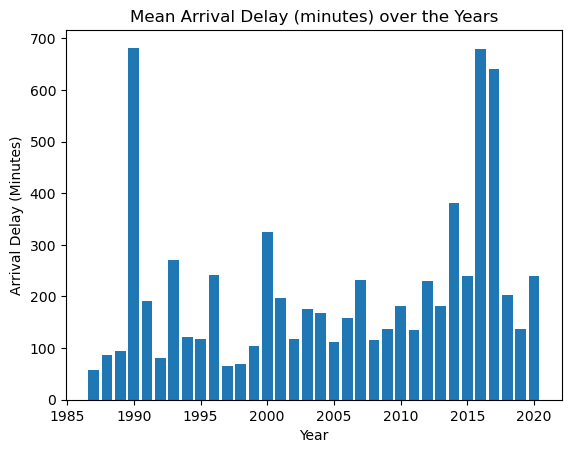

In [117]:
# Convert the "FlightDate" column to datetime
flight_data["FlightDate"] = pd.to_datetime(flight_data["FlightDate"])
# Add a column for the year
flight_data["Year"] = flight_data["FlightDate"].dt.year
#create a bar blot for the delay times over the years
plt.bar('Year', 'ArrDelayMinutes', data=flight_data)
plt.xlabel('Year')
plt.ylabel('Arrival Delay (Minutes)')
plt.title('Mean Arrival Delay (minutes) over the Years')
plt.show()

##Visualize the mean delay times by Reporting airlines

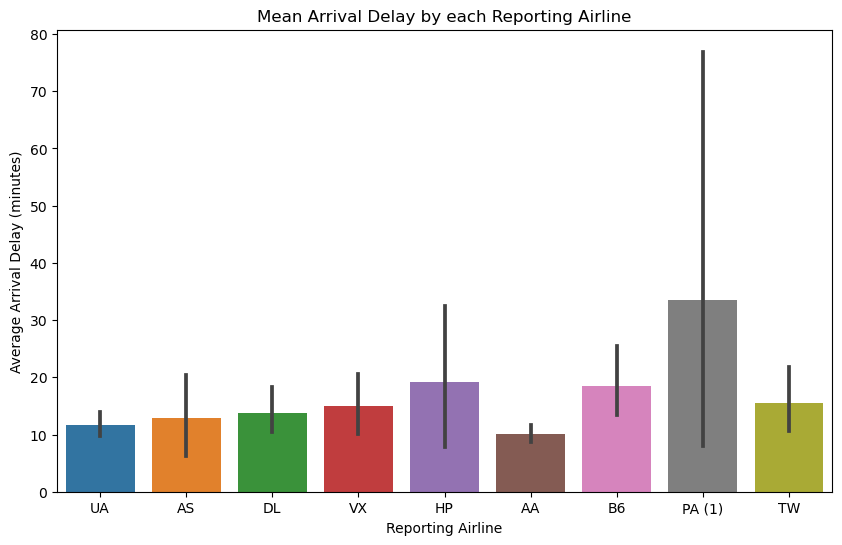

In [119]:
# Create the bar plot for mean arrival delay time over reporting airlines
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(x='Reporting_Airline', y='ArrDelayMinutes', data=flight_data)
plt.xlabel('Reporting Airline')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Mean Arrival Delay by each Reporting Airline')
plt.show()

##visualize arrival delay by departure hour

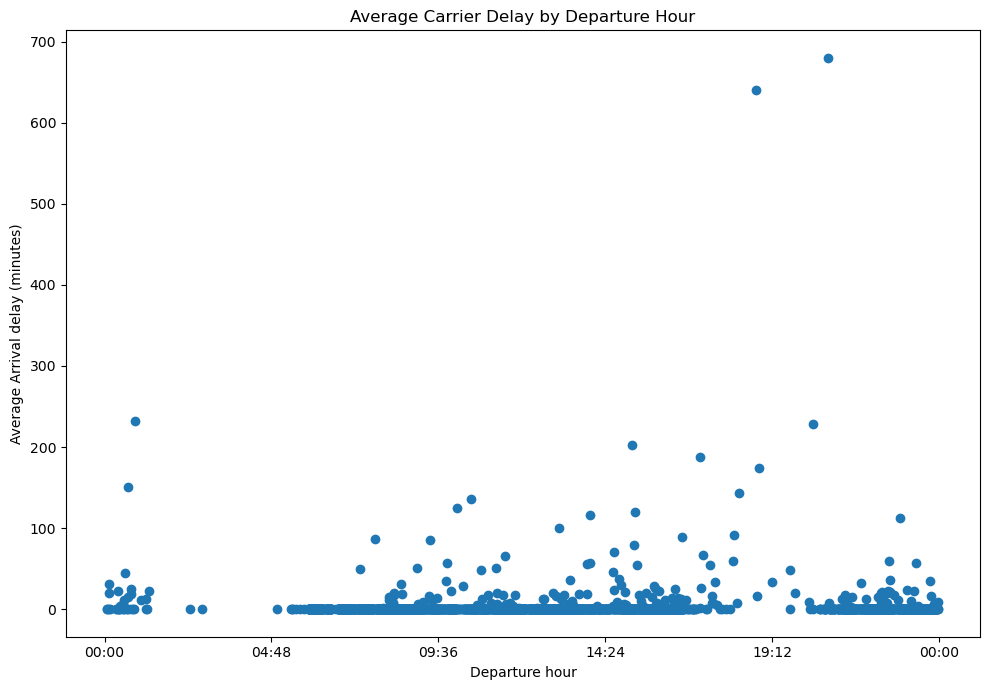

In [121]:
#modify the data to 
# Clean up trailing whitespaces and convert to timedeltas 
flight_data['DepTime']=flight_data['DepTime'].apply(str)
# Clean the time column by removing trailing whitespaces
flight_data['DepTime'] = flight_data['DepTime'].str.strip()
# Pad the time column with zeros to create the hh:mm format
flight_data['DepTime'] = flight_data['DepTime'].str.pad(width=4, side='left', fillchar='0')

# Convert the cleaned time column to a time object
flight_data["DateTime"] = pd.to_datetime(flight_data["DepTime"], format="%H%M")

#set the index column for the data
flight_data = flight_data.set_index("DateTime")
# Extract the time part of the datetime column and assign it to a new column
flight_data["DepartureTime"] = flight_data.index.time
flight_data["DepartureTime"] = pd.to_datetime(flight_data["DepartureTime"], format="%H:%M:%S")
flight_data["DepartureTime"] = mdates.date2num(flight_data["DepartureTime"])
#plot the average carrier delay over departure hour
plt.figure(figsize = (10, 7))
plt.scatter('DepartureTime', 'CarrierDelay', data=flight_data)
plt.xlabel("Departure hour")
plt.ylabel("Average Arrival delay (minutes)")
plt.title("Average Carrier Delay by Departure Hour")
#modify the x-axis to display the hour
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.tight_layout()  # Adjust spacing
plt.show()

##Relationship between month and whether

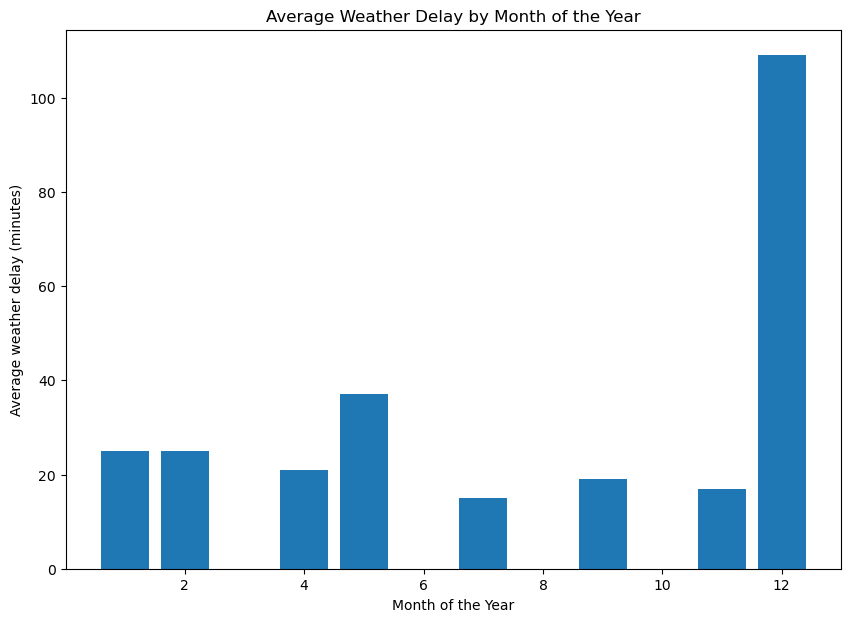

In [123]:

#visualize the weather delays across months of the year to establish which month has the highest delays
plt.figure(figsize = (10, 7))
plt.bar('Month', 'WeatherDelay', data=flight_data)
plt.xlabel("Month of the Year")
plt.ylabel("Average weather delay (minutes)")
plt.title("Average Weather Delay by Month of the Year")
plt.show()

/tmp/ipykernel_129/3659638748.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='DayOfWeek', y='ArrDelayMinutes', data=flight_data, ci = False)


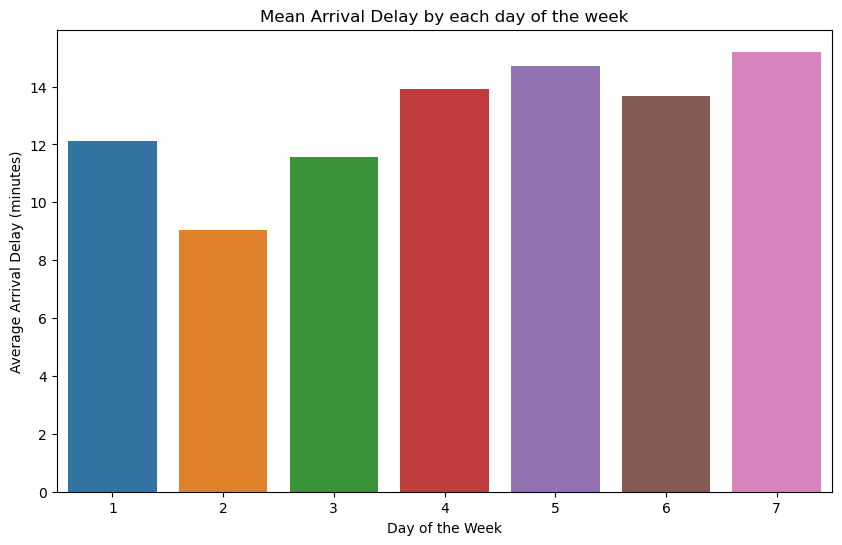

In [125]:

# Create the bar plot for the arrival delay times (minutes) across days of the week
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(x='DayOfWeek', y='ArrDelayMinutes', data=flight_data, ci = False)
plt.xlabel('Day of the Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Mean Arrival Delay by each day of the week')
plt.show()

which hours are planes most subject to previous flight delay and departure delay?

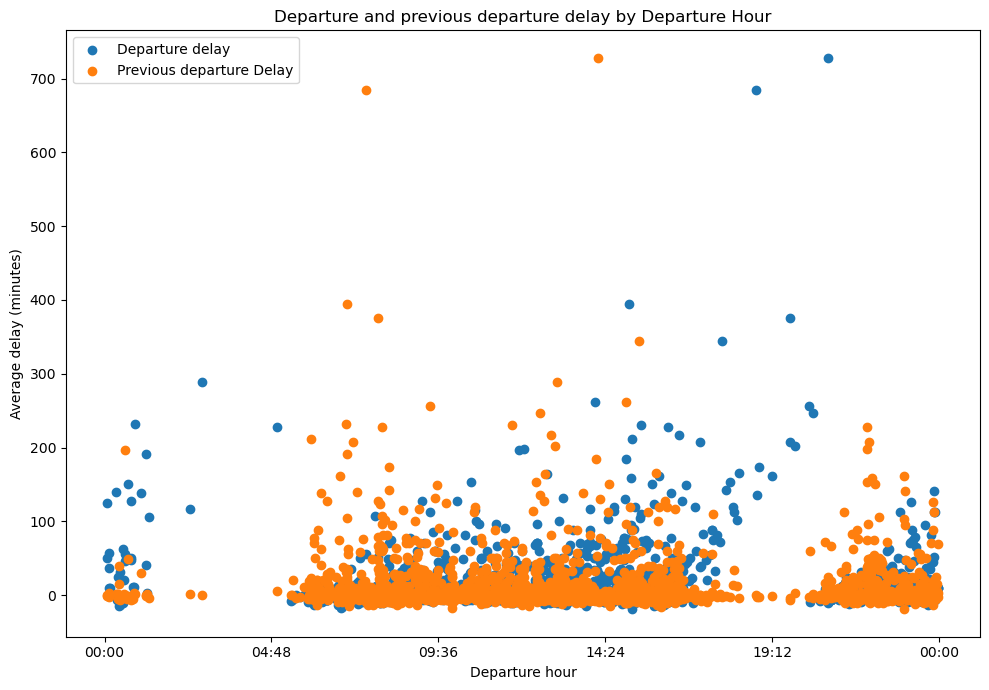

In [127]:

#lag the values of the departure delay to link up flights with the previous delays
flight_data['prvious_delay'] = flight_data['DepDelay'].shift(1)

#we can now plot the previous delay and departure delay on the same chart over the departure hour
plt.figure(figsize = (10, 7))
plt.scatter('DepartureTime', 'DepDelay', data=flight_data, label = "Departure delay")
plt.scatter('DepartureTime', 'prvious_delay', data=flight_data, label = "Previous departure Delay")
plt.xlabel("Departure hour")
plt.ylabel("Average delay (minutes)")
plt.title("Departure and previous departure delay by Departure Hour")
#modify the x-axis to ensure it displays the time (hour) rather than the default year
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.tight_layout()  # Adjust spacing
plt.legend()
plt.show()

In [125]:
# Function to map month to quarter
def map_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    elif month in [10, 11, 12]:
        return 'Q4'
    else:
        return 'Unknown'  # For any month not in the list

# Apply the function to the 'Month' column
flight_data['Quarter'] = flight_data['Month'].apply(map_to_quarter)

In [127]:
# Function to map Day of the week to degree of business
def map_to_b(DayOfWeek):
    if DayOfWeek in [1, 5, 7]:
        return ' Very busy'
    elif DayOfWeek in [2,3]:
        return 'less busy'
    elif DayOfWeek in [4,6]:
        return 'moderately busy'
    else:
        return 'Unknown'  # For any day not in the list

# Apply the function to the 'Day of the week' column
flight_data['Busy'] = flight_data['DayOfWeek'].apply(map_to_b)

In [135]:

# Define predictor and response variables (predicting arrival delay time (minutes) from departure delay
#departure time, late aircraft delay, ...
flight_data['DepTime'] = flight_data['DepTime'].apply(int)
# Get dummies for column 'Day of the week'
Day_dummy = pd.get_dummies(flight_data['Busy']).astype(int)
# Get dummies for column 'Month'
Month_dummy = pd.get_dummies(flight_data['Quarter']).astype(int)
# Concatenate the dummies with the original DataFrame
flight_data = pd.concat([flight_data, Day_dummy], axis=1)
flight_data = pd.concat([flight_data, Month_dummy], axis=1)

y = flight_data['ArrDelayMinutes']  # Response variable (arrival delays)
X = flight_data.iloc[:, [18]+[8]+[15]+[16] + list(range(24,29))]
# Add a constant to the predictor variable
X = sm.add_constant(X)
# Fit the linear regression model
model = sm.OLS(y, X).fit()

# View the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1790.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:50:31   Log-Likelihood:                -11606.
No. Observations:                2855   AIC:                         2.323e+04
Df Residuals:                    2845   BIC:                         2.329e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.0398      0.88

In [107]:
flight_data.head()

,Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,...,DivArrDelay,Quarter,Busy,Very busy,less busy,moderately busy,Q1,Q2,Q3,Q4
0,3,5,2003-03-28,UA,LAX,JFK,2210,615,2209,617,...,0.0,Q1,Very busy,1,0,0,1,0,0,0
1,11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,...,0.0,Q4,moderately busy,0,0,1,0,0,0,1
2,8,5,2015-08-28,UA,LAX,JFK,805,1634,757,1620,...,0.0,Q3,Very busy,1,0,0,0,0,1,0
3,4,7,2003-04-20,DL,LAX,JFK,2205,619,2212,616,...,0.0,Q2,Very busy,1,0,0,0,1,0,0
4,11,3,2005-11-30,UA,LAX,JFK,840,1653,836,1640,...,0.0,Q4,less busy,0,1,0,0,0,0,1
